In [3]:
import numpy as np
from random import randrange as rd
import math
from math import sqrt
import matplotlib.pyplot as plt
# https://stackoverflow.com/questions/18670974/how-to-get-a-series-of-random-points-in-a-specific-range-of-distances-from-a-ref

# Random pot placement in image dimensions

In [4]:
def compare_points(pt1, pts, dist_thresh=400):
    if len(pts) == 0:
        return False
    trues = []
    
    for pt in pts:    
        dist = math.dist(pt1, pt)
        
        if dist > dist_thresh:
            trues.append(True)
        else:
            trues.append(False)
    return all(trues)

In [30]:
def rand_cutout_positions(minx, maxx, miny, maxy, num_points, min_distance):
    """Gets random point positions. Returns a list of positions that are 
    separated by a certain distance and within a given bounds.

    Args:
        minx (int): min x for all points
        maxx (int): max x for all points
        miny (int): min y for all points
        maxy (int): max y for all points
        num_points (int): number of points to return
        min_distance (int): minimum distance between points (euclidean distance)

    Returns:
        redptlist (list): list of all points
    """
    ptBlu = [0,0]
    redptlist=[] #inizialize a void lists for red point coordinates

    pointcounter=0 #initizlize counter for the while loop
    while True: #create a potentailly infinite loop! pay attention!
        if pointcounter<num_points: #set the number of point you want to add (in this case 20)
                x_RedPtshift=rd(minx, maxx,1) #x shift of a red point 
                y_RedPtshift=rd(miny, maxy,1) #y shift of a red point
                ptRedx=ptBlu[0]+ x_RedPtshift#x coordinate of a red point
                ptRedy=ptBlu[1]+ y_RedPtshift #y coordinate of a red point
                ptRed=[ptRedx,ptRedy]
                if sqrt(x_RedPtshift**2+y_RedPtshift**2)>min_distance: #if the point create go beyond the minimum distance
                    ptRedx=ptBlu[0]+ x_RedPtshift#x coordinate of a red point
                    ptRedy=ptBlu[1]+ y_RedPtshift #y coordinate of a red point
                    ptRed=[ptRedx,ptRedy]
                    if ptRed not in redptlist: #avoid to create red point with the same coordinates
                        redptlist.append(ptRed) # add to a list with this notation [x1,y1],[x2,y2]
                        pointcounter+=1 #add one to the counter of how many points you have in your list 
        else: #when pointcounter reach the number of points you want the while cicle ends
            break
    return redptlist

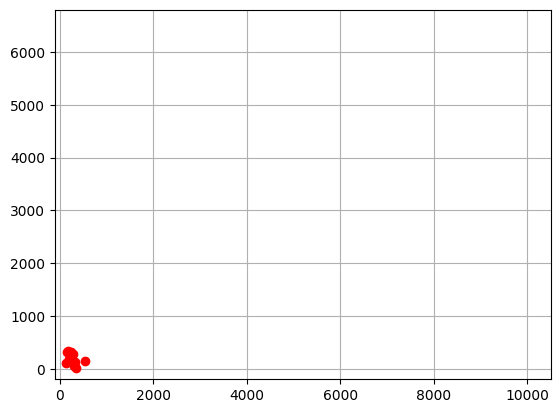

In [90]:
minx = 0
maxx= 560
miny = 0
maxy = 368
num_points = 10
min_distance = 40

# Get points
ptBlu = rand_cutout_positions(minx, maxx, miny, maxy, num_points, min_distance)

# Separate to plot
xredptlist = [x[0] for x in ptBlu] 
yredptlist = [x[1] for x in ptBlu]

# Plot
plt.plot(xredptlist, yredptlist, 'ro')#plot red points
fig = plt.gcf()
plt.axis([-100, 10500, -200, 6800])
plt.grid(True)
plt.show()

# Random cutout positino in pot

In [ ]:
ptcutcenter=[11,12,13] #example of blu point
ptRedx=ptBlu[0]+rd(-10,10,1) #x coordinate of a red point(rd is the function stand for random.randrange)
ptRedy=ptBlu[1]+rd(-10,10,1) #y coordinate of a red point
ptRedz=ptBlu[2]+rd(-10,10,1) #z coordinate of a red point
ptRed=[ptRedx,ptRedy,ptRedz] #list with the x,y,z coordinates

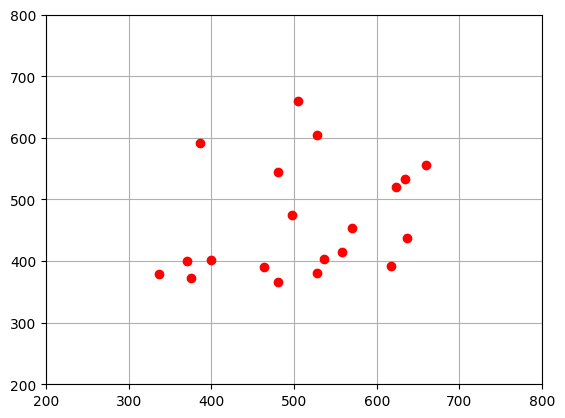

In [91]:
ptBlu=[500,500] #example of blu point
num_points = 20
mindist=20#set the minimum euclidean distance beyond you want to create the points
maxdist=250#set the maximum euclidean distance redpoint can have from blu point

def rand_multicut_positions(pot_center, num_points, mindist, maxdist):
    """Altered from https://stackoverflow.com/questions/18670974/how-to-get-a-series-of-random-points-in-a-specific-range-of-distances-from-a-ref

    Args:
        pot_center (_type_): _description_
        num_points (_type_): _description_
        mindist (_type_): _description_
        maxdist (_type_): _description_

    Returns:
        _type_: _description_
    """
    cutptlist=[] #inizialize a void lists for red point coordinates
    
    maxc=int(sqrt((maxdist**2)/2)) #from the euclidean distance formula you can get the max      coordinate

    pointcounter=0 #initizlize counter for the while loop
    while True: #create a potentailly infinite loop! pay attention!
         if pointcounter<num_points: #set the number of point you want to add (in this case 20)
             x_cutPtshift=rd(-maxc,maxc,1) #x shift of a red point 
             y_cutPtshift=rd(-maxc,maxc,1) #y shift of a red point
             if sqrt(x_cutPtshift**2+y_cutPtshift**2)>mindist: #if the point create go beyond the minimum distance
                 ptcutx=pot_center[0]+ x_cutPtshift#x coordinate of a red point
                 ptcuty=pot_center[1]+ y_cutPtshift #y coordinate of a red point
                 ptcut=[ptcutx,ptcuty] #list with the x,y,z coordinates
                 if ptcut not in cutptlist: #avoid to create red point with the same coordinates
                     cutptlist.append(ptcut) # add to a list with this notation [x1,y1],[x2,y2]
                     pointcounter+=1 #add one to the counter of how many points you have in your list 
         else: #when pointcounter reach the number of points you want the while cicle ends
             break
    
    return cutptlist


newptBlu = rand_multicut_positions(ptBlu, num_points, mindist, maxdist)

# Separate to plot
xredptlist = [x[0] for x in newptBlu] 
yredptlist = [x[1] for x in newptBlu]

# Plot
plt.plot(xredptlist, yredptlist, 'ro')#plot red points
fig = plt.gcf()
plt.axis([200, 800, 200, 800])
plt.grid(True)
plt.show()